In [15]:
# Practical 1 (Part 1): Matrix operation and Differentiation of vector and matrix.

import numpy as np

A = np.array([[1,2], [3,4]])
B = np.array([[1,2], [5,6]])

print("Addition", A+B)
print("Substraction", A-B)
print("Element-wise Multiplication", A*B)
print("Matrix-wise Multiplication", A@B)
print("Inverse of Matrix", np.linalg.inv(A))
print("Determinant", round(np.linalg.det(A), 2))
print("Rank", np.linalg.matrix_rank(A))
print("Trace", np.linalg.trace(A))
# Eigen Values and Vectors

vals, vecs = np.linalg.eig(A)
print("Eigen Values : ", vals)
print("Eigen Vectors : ", vecs)

Addition [[ 2  4]
 [ 8 10]]
Substraction [[ 0  0]
 [-2 -2]]
Element-wise Multiplication [[ 1  4]
 [15 24]]
Matrix-wise Multiplication [[11 14]
 [23 30]]
Inverse of Matrix [[-2.   1. ]
 [ 1.5 -0.5]]
Determinant -2.0
Rank 2
Trace 5
Eigen Values :  [-0.37228132  5.37228132]
Eigen Vectors :  [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [22]:
# Practical 1 (Part 2): Matrix operation and Differentiation of vector and matrix.

from sympy import symbols, Matrix, diff, hessian

x1, x2 = symbols('x1 x2')
x = Matrix([x1,x2])

# Gradient

func = x1**2 + 3*x1*x2 + x2**2
print("Gradient", [diff(func, i) for i in x])

# Jacobian Matrix
func_2 = Matrix([x1**2 + 3*x1*x2 + x2**2])

J = func_2.jacobian([x1,x2])
print("Jacobian", J)

# ALternate method
print("Jacobian", diff(func, x1), diff(func, x2))

H = hessian(func_2, (x1,x2))
print ("Hessian Matrix", H)

Gradient [2*x1 + 3*x2, 3*x1 + 2*x2]
Jacobian Matrix([[2*x1 + 3*x2, 3*x1 + 2*x2]])
Jacobian 2*x1 + 3*x2 3*x1 + 2*x2
Hessian Matrix Matrix([[2, 3], [3, 2]])


In [17]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features and target
X = np.array([[2,15],[3,10],[4,8],[5,5],[6,3]])
y = np.array([220, 280, 330, 400, 470])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model training
model = LinearRegression()
model.fit(X_scaled, y)

# Results
print("\nLinear Regression Results:")
print("Intercept(β0):", round(model.intercept_, 2))
print("Coefficients(β1 for rooms, β2 for age):", np.round(model.coef_, 2))

# Prediction
new_data = np.array([[4, 6]])
pred = model.predict(scaler.transform(new_data))
print("Predicted Price for a house with 4 rooms and age 6 years: $", round(pred[0], 2))

# Code option 2
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Create DataFrame
data = pd.DataFrame({
    'Rooms': [2, 3, 4, 5, 6],
    'Age': [15, 10, 8, 5, 3],
    'Price': [220, 280, 330, 400, 470]
})

# Features and target
X = data[['Rooms', 'Age']]
y = data['Price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression
model = LinearRegression()
model.fit(X_scaled, y)

# Results
print("\nLinear Regression Results:")
print("Intercept (β₀):", round(model.intercept_, 2))
print("Coefficients (β₁, β₂):", np.round(model.coef_, 2))

# Predict for new data
new_data = pd.DataFrame({'Rooms': [4], 'Age': [6]})
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print(f"Predicted Price for a house with 4 rooms and age 6 years: ${round(prediction[0], 2)}")


# Code 3: Without standard scalar
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data
df = pd.DataFrame({
    "Rooms": [2, 3, 4, 5, 6],
    "Age": [15, 10, 8, 5, 3],
    "Price": [220, 280, 330, 400, 470]
})

X = df[["Rooms", "Age"]]
y = df["Price"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prediction
new_data = pd.DataFrame({"Rooms": [4], "Age": [6]})
pred = model.predict(new_data)
print("Predicted price:", pred[0])


Linear Regression Results:
Intercept(β0): 340.0
Coefficients(β1 for rooms, β2 for age): [99.83 12.35]
Predicted Price for a house with 4 rooms and age 6 years: $ 333.48

Linear Regression Results:
Intercept (β₀): 340.0
Coefficients (β₁, β₂): [99.83 12.35]
Predicted Price for a house with 4 rooms and age 6 years: $333.48


In [28]:
# Practical 2: Integration of a vector and matrix. 

from sympy import symbols, Matrix, integrate, sin, exp, pi

x = symbols('x')

# Vector integration (0 to 1)
vec = Matrix([x**2, x**0.5, x**3])
vec_integral = vec.applyfunc(lambda f: integrate(f, (x, 0, 1)))
print("Vector Integral (0 to 1):\n", vec_integral)

# Matrix integration (0 to π)
mat = Matrix([[x, x**2], [sin(x), exp(x)]])
mat_integral = mat.applyfunc(lambda f: integrate(f, (x, 0, pi)))
print("\nMatrix Integral (0 to π):\n", mat_integral)


Vector Integral (0 to 1):
 Matrix([[1/3], [0.666666666666667], [1/4]])

Matrix Integral (0 to π):
 Matrix([[pi**2/2, pi**3/3], [2, -1 + exp(pi)]])


In [31]:
## Optional 2: To get decimal value

from sympy import symbols, Matrix, integrate, sin, exp, pi, N

x = symbols('x')

# Vector integration (0 to 1)
vec = Matrix([x**2, x**0.5, x**3])
vec_integral = vec.applyfunc(lambda f: integrate(f, (x, 0, 1)))
vec_decimal = vec_integral.applyfunc(lambda v: N(v, 5))

print("Vector Integral (0 to 1):")
print("Symbolic:\n", vec_integral)
print("Decimal:\n", vec_decimal)

# Matrix integration (0 to π)
mat = Matrix([[x, x**2], [sin(x), exp(x)]])
mat_integral = mat.applyfunc(lambda f: integrate(f, (x, 0, pi)))
mat_decimal = mat_integral.applyfunc(lambda v: N(v, 5))

print("\nMatrix Integral (0 to π):")
print("Symbolic:\n", mat_integral)
print("Decimal:\n", mat_decimal)


Vector Integral (0 to 1):
Symbolic:
 Matrix([[1/3], [0.666666666666667], [1/4]])
Decimal:
 Matrix([[0.33333], [0.66667], [0.25000]])

Matrix Integral (0 to π):
Symbolic:
 Matrix([[pi**2/2, pi**3/3], [2, -1 + exp(pi)]])
Decimal:
 Matrix([[4.9348, 10.335], [2.0000, 22.141]])


In [18]:
## integrate single function
from sympy import integrate, sin, cos, symbols, pi

x = symbols("x")
func = sin(x)
int = integrate(func, x)
print(int)

int_def = integrate(func, (x,0,pi))
print(int_def)

## Integrate multiple functions
from sympy import Matrix, symbols, sin, cos, exp

x = symbols("x")
func = Matrix([x**2, sin(x), exp(x)])
int = func.applyfunc(lambda f: integrate(f, x))
int_def = func.applyfunc(lambda f: integrate(f, (x, 0 , 1)))
int_def

-cos(x)
2


Matrix([
[       1/3],
[1 - cos(1)],
[    -1 + E]])

In [35]:
#Practical 3: Simplex algorithm and Duality 

# Part A: Simplex
from scipy.optimize import linprog

# Coefficients for -Z because linprog minimizes
c = [-2, -7, -6, -4]

# Coefficients of constraints
A = [
    [1,   1,   0.83, 0.5],
    [1.2, 1,   1,    1.2],
    [0.5, 0.7, 1.2,  0.4]
]

# Right-hand sides of constraints
b = [65, 96, 80]

# All variables >= 0
bounds = [(0, None)] * 4

# Solve the LP
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

# Show results
print("Optimal Solution Found:")
for i, val in enumerate(res.x, start=1):
    print(f"x{i} = {val:.2f}")

print("Maximum Z =", round(-res.fun, 2))


# Alternate print command
#print(f"Optimal Solution: {np.round(res.x,2)}, Max Z = {-res.fun:.2f}")

# Part B: Duality
from scipy.optimize import linprog

# Minimize W = 8y1 + 15y2
c = [8, 15]

# Constraints (converted to ≤ form)
A = [
    [-2, -1],  # 2y1 + y2 ≥ 3 → -2y1 - y2 ≤ -3
    [-1, -3]   # y1 + 3y2 ≥ 5 → -y1 - 3y2 ≤ -5
]
b = [-3, -5]

bounds = [(0, None)] * 2

# Solve
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

# Output
print("\nDual Problem Result:")
for i, y in enumerate(result.x):
    print(f"y{i+1} = {y:.2f}")
print("Min W =", round(result.fun, 2))


# Simple code
from scipy.optimize import linprog

c = [-2, -7, -6, -4]
a = [
    [1, 1, 0.83, 0.5],
    [1.2, 1,1,1.2],
    [0.5, 0.7, 1.2, 0.4]
]
b = [65, 96, 86]

#bounds = [(0,None)]*4

res = linprog(c,A_ub=a, b_ub=b,bounds=(0,None))
print("Maximum value of function is $",-res.fun)
print("Optimality", res.x)

Optimal Solution Found:
x1 = 0.00
x2 = 5.16
x3 = 53.20
x4 = 31.37
Maximum Z = 480.79

Dual Problem Result:
y1 = 0.80
y2 = 1.40
Min W = 27.4


In [43]:
# Practical 4:  Implementation of Newton's method 

from sympy import symbols, diff, lambdify

# Define variable and function
x = symbols('x')
f = x**2 - 2

# Compute derivative
f_prime = diff(f, x)

# Convert symbolic functions to numerical functions
f_num = lambdify(x, f, 'numpy')
f_prime_num = lambdify(x, f_prime, 'numpy')

# Initial guess
x0 = 1.0

# Tolerance and maximum iterations
tol = 1e-6
max_iter = 10

# Newton's Method Loop
for i in range(max_iter):
    x1 = x0 - f_num(x0) / f_prime_num(x0)
    print(f"Iteration {i+1}: x = {x1:.6f}")
    if abs(x1 - x0) < tol:
        break
    x0 = x1

print("\nApproximate Root:", round(x1, 6))


# Option 2: Code
from sympy import symbols, diff, lambdify

x = symbols('x')
f_expr = x**2 - 2

f = lambdify(x, f_expr, 'numpy')
f_prime = lambdify(x, diff(f_expr, x), 'numpy')

x0 = 1.0
for i in range(10):
    x1 = x0 - f(x0) / f_prime(x0)
    print(f"Iteration {i+1}: x = {x1:.6f}")
    if abs(x1 - x0) < 1e-6:
        break
    x0 = x1

print("Root:", x1)


# Method 3- Simple
from scipy.optimize import root_scalar

# Define f and f′
def f(x): return x**2 - 2
def f_prime(x): return 2*x

# Call SciPy's Newton solver
res = root_scalar(f, fprime=f_prime, method='newton', x0=1.0)

# Print result
if res.converged:
    print(f"Root found: {res.root:.6f}")
else:
    print("Newton's method did not converge.")


# Method 4 - simple and shows all iterations

from mpmath import findroot

def f(x):
    return x**2 - 2

root = findroot(f, 1.0, solver='newton', verbose=True)
root


Iteration 1: x = 1.500000
Iteration 2: x = 1.416667
Iteration 3: x = 1.414216
Iteration 4: x = 1.414214
Iteration 5: x = 1.414214

Approximate Root: 1.414214
Iteration 1: x = 1.500000
Iteration 2: x = 1.416667
Iteration 3: x = 1.414216
Iteration 4: x = 1.414214
Iteration 5: x = 1.414214
Root: 1.4142135623730951
Root found: 1.414214


In [19]:
# Practical 5:  Implementation of Secant method 
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        if f(x1) == f(x0):  # Avoid division by zero
            print("Division by zero in iteration", i+1)
            return None
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        print(f"Iteration {i+1}: x = {x2:.6f}")
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return x2  # Last approximation

# Example: f(x) = x^2 - 2
def f(x): return x**2 - 2

root = secant_method(f, x0=1.0, x1=2.0)
print(f"\nApproximate root: {root:.6f}")


# Method 2 - Simple
from scipy.optimize import root_scalar

# Define the function
def f(x): return x**2 - 2

# Use built-in secant method
result = root_scalar(f, method='secant', x0=1.0, x1=2.0, xtol=1e-6)

# Print result
if result.converged:
    print(f"Root found: {result.root:.6f}")
else:
    print("Secant method did not converge.")


# Method 3- Shows all iterations
from mpmath import findroot

def f(x):
    return x**2 - 2


mp = findroot(f, x0 = 0.1, solver="secant", verbose=True)
print(mp)


Iteration 1: x = 1.333333
Iteration 2: x = 1.400000
Iteration 3: x = 1.414634
Iteration 4: x = 1.414211
Iteration 5: x = 1.414214
Iteration 6: x = 1.414214

Approximate root: 1.414214
Root found: 1.414214
x:     4.5222222222222221162
error: 0.25
x:     0.735347776510832395824
error: 4.17222222222222211065
x:     1.01290254952045883137
error: 3.78687444571138972038
x:     1.57004726196338429779
error: 0.277554773009626435542
x:     1.39000179505918585771
error: 0.557144712442925466426
x:     1.41293891820285927814
error: 0.180045466904198440079
x:     1.41422457273371800434
error: 0.0229371231436734204235
x:     1.41421355740900576807
error: 0.00128565453085872620438
x:     1.41421356237307572492
error: 0.0000110153247122362744202
x:     1.4142135623730950488
error: 4.96406995685008343695e-9
x:     1.4142135623730950488
error: 1.93238850332825727249e-14
1.4142135623731


In [4]:
# Practical 6:  Implementation of Lagrange multiplier method 

from sympy import symbols, diff, solve, Eq

# Define variables
x, y, λ = symbols('x y λ')

# Objective and constraint
f = x + y
g = x**2 + y**2 - 1

# Lagrangian
L = f - λ * g  # for maximization

# Solve ∇L = 0
solutions = solve([diff(L, v) for v in (x, y, λ)], (x, y, λ), dict=True)

# Display results
print("Maximization:")
for s in solutions:
    fx = f.subs({x: s[x], y: s[y]})
    print(f"x = {s[x]:.4f}, y = {s[y]:.4f}, f(x, y) = {fx.evalf():.4f}")


#Example 2: Minimization

from sympy import symbols, diff, solve

# Define symbols
x, y, lam = symbols('x y lam')

# Function and constraint
f = x**2 + y**2
g = x + y - 1

# Lagrangian
L = f + lam * g # for minimization

# Derivatives
eqs = [diff(L, var) for var in (x, y, lam)]

# Solve
solutions = solve(eqs, (x, y, lam), dict=True)

# Output
print("\nMinimization:")
for s in solutions:
    val = f.subs({x: s[x], y: s[y]})
    print(f"x = {s[x]}, y = {s[y]}, f(x, y) = {val}")


# Alternative library
import cvxpy as cp

# Variables
x = cp.Variable()
y = cp.Variable()

# Equality constraint
constraint = (x + y == 1)

# Objective
objective = cp.Minimize(x**2 + y**2)

# Problem
problem = cp.Problem(objective, [constraint])
problem.solve()

print("x =", x.value)
print("y =", y.value)
print("Optimal value =", problem.value)

# Get Lagrange multiplier
dual_val = constraint.dual_value
print("Lagrange multiplier (λ) =", dual_val)



Maximization:
x = -0.7071, y = -0.7071, f(x, y) = -1.4142
x = 0.7071, y = 0.7071, f(x, y) = 1.4142

Minimization:
x = 1/2, y = 1/2, f(x, y) = 1/2


In [23]:
# Practical 7: KKT

from scipy.optimize import minimize

# Objective function
def objective(x):
    return x[0]**2 + x[1]**2

# Constraints
cons = [
    {"type": "eq", "fun": lambda x: x[0] + x[1] - 1},
    {"type": "ineq", "fun": lambda x: x[0]},
    {"type": "ineq", "fun": lambda x: x[1]},
]

# Initial guess
x0 = [0.5, 0.5]

# Solve
res = minimize(objective, x0, constraints=cons)

# Display result
print(f"Optimal solution: {res.x}")
print(f"Optimal value: {res.fun}")


#Method 2: Easy
import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

objective = cp.Minimize(x**2 + y**2)
constraints = [x + y <= 1]

problem = cp.Problem(objective, constraints)
problem.solve()

print("x =", x.value)
print("y =", y.value)
print("Optimal value =", problem.value)

dual_val = constraints[0].dual_value
print("Lagrange multiplier λ =", dual_val)

Optimal solution: [0.5 0.5]
Optimal value: 0.5
Polishing not needed - no active set detected at optimal point
x = 0.0
y = 0.0
Optimal value = 0.0
Lagrange multiplier λ = 0.0


In [11]:
# Practical 8 Implement BFGS method

# For minimization
from scipy.optimize import minimize

def objective(x):
    return (x[0] - 2)**2 + (x[1] - 3)**2

x0 = [0, 0]
result = minimize(objective, x0, method='BFGS')

print("Optimal solution:", result.x)
print("Optimal value:", result.fun)
print("Number of iterations:", result.nit)

# For maximization
from scipy.optimize import minimize

# Negate the objective to maximize
def objective(x):
    return -(x[0] - 2)**2 - (x[1] - 3)**2     # Only sign changed here, rest code same

x0 = [0, 0]

result = minimize(objective, x0, method='BFGS')

# Because we minimized the negative function, flip the sign back
max_value = -result.fun

print("Optimal solution:", result.x)
print("Maximum value:", max_value)
print("Number of iterations:", result.nit)

Optimal solution: [1.99999999 2.99999999]
Optimal value: 1.84598775337616e-16
Number of iterations: 3
Optimal solution: [-573.69313094 -860.53969642]
Maximum value: 1077123.3883022722
Number of iterations: 1


2025-07-06 00:41:37,848 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=1.54e-23
2025-07-06 00:41:38,269 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5380866296590987e-23, best pos: [-2.77100926e-12  2.77531512e-12]


Best position: [-2.77100926e-12  2.77531512e-12]
Best score: 1.5380866296590987e-23


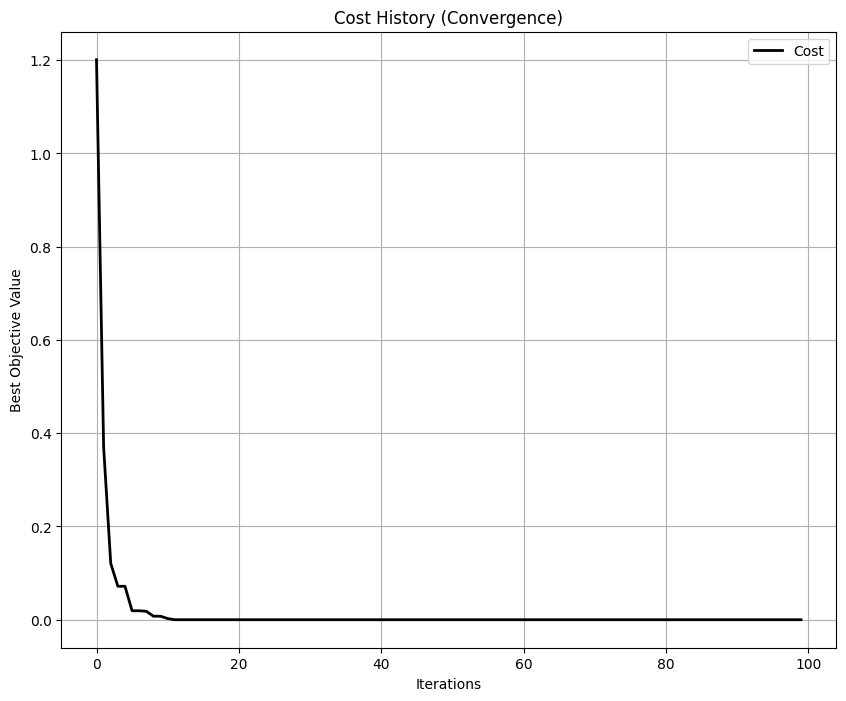

Best position: [ 4.03419063e-09  2.10983674e-10 -6.43655812e-09 -9.99399945e-09
 -1.07139012e-08]
Best score: 2.724161931068631e-16


In [6]:
# Practical 9 Particle Swarm Optimization Algorithm

# Code 1

#!pip install pyswarms

import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt

# Define the objective function (sphere function)
def sphere(x):
    return np.sum(x**2, axis=1)

# PSO settings
dimensions = 2  # Must be 2 for 2D plotting
bounds = (np.array([-10, -10]), np.array([10, 10]))
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5}

# Initialize optimizer
optimizer = ps.single.GlobalBestPSO(
    n_particles=30,
    dimensions=dimensions,
    options=options,
    bounds=bounds
)

# Run optimization
best_score, best_position = optimizer.optimize(sphere, iters=100)

# Output
print("Best position:", best_position)
print("Best score:", best_score)

# Below part of code is optional
# Plot the swarm trajectory in 2D
from pyswarms.utils.plotters import plot_cost_history
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Animator

# Plot cost over time
plot_cost_history(optimizer.cost_history)
plt.title("Cost History (Convergence)")
plt.xlabel("Iterations")
plt.ylabel("Best Objective Value")
plt.grid(True)
plt.show()

#### Code 2
# Code 2
# Objective Function: Sphere function
def sphere(x):
    return np.sum(x**2)

# Particle Class
class Particle:
    def __init__(self, dim, bounds):
        self.pos = np.random.uniform(bounds[0], bounds[1], dim)
        self.vel = np.zeros(dim)
        self.best_pos = self.pos.copy()
        self.best_val = float('inf')

    def update(self, global_best, w, c1, c2, bounds):
        r1, r2 = np.random.rand(2)
        self.vel = w * self.vel \
                   + c1 * r1 * (self.best_pos - self.pos) \
                   + c2 * r2 * (global_best - self.pos)
        self.pos += self.vel
        self.pos = np.clip(self.pos, bounds[0], bounds[1])

# PSO Function
def pso(objective, dim=5, bounds=(-10, 10), num_particles=30, max_iter=100,
        w=0.5, c1=1.5, c2=1.5):
    swarm = [Particle(dim, bounds) for _ in range(num_particles)]
    global_best = swarm[0].pos.copy()
    global_best_val = float('inf')

    for _ in range(max_iter):
        for p in swarm:
            val = objective(p.pos)
            if val < p.best_val:
                p.best_val = val
                p.best_pos = p.pos.copy()
            if val < global_best_val:
                global_best_val = val
                global_best = p.pos.copy()
        for p in swarm:
            p.update(global_best, w, c1, c2, bounds)

    return global_best, global_best_val

# Run PSO
best_position, best_score = pso(sphere)
print("Best position:", best_position)
print("Best score:", best_score)

Best solution: [0.04208946 0.04007324]
Best fitness: 0.0033773870236132653


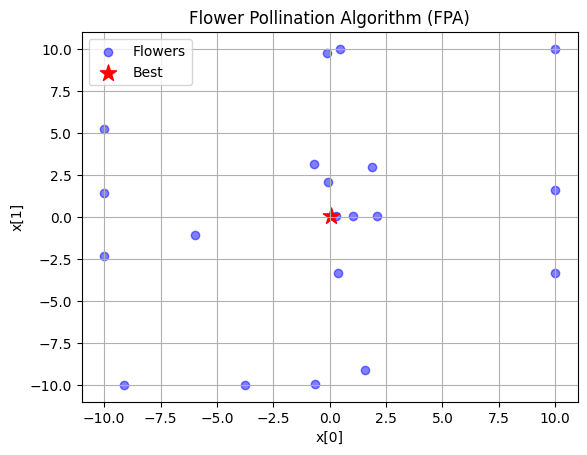

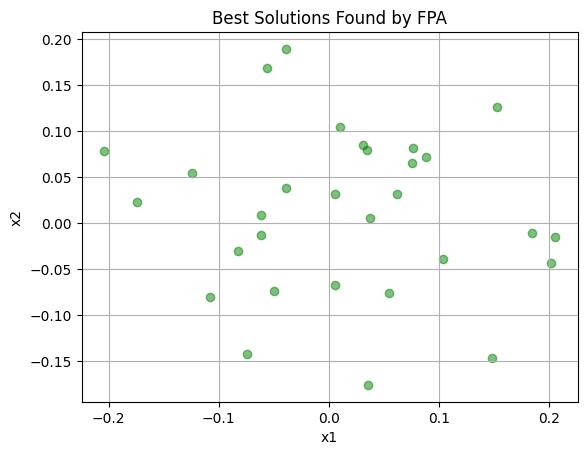

In [16]:
# Practical 10: Flower Pollination Algorithm

import numpy as np
import matplotlib.pyplot as plt
import math  # <-- Import Python's math module

def sphere(x):
    return np.sum(x**2)

def levy_flight(beta, dim):
    sigma = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
             (math.gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2))) ** (1 / beta)
    u = np.random.randn(dim) * sigma
    v = np.random.randn(dim)
    return u / (abs(v) ** (1 / beta))

def flower_pollination(n=20, dim=2, max_iter=50, p=0.8, bounds=(-10, 10)):
    population = np.random.uniform(bounds[0], bounds[1], (n, dim))
    fitness = np.array([sphere(x) for x in population])

    best_idx = np.argmin(fitness)
    best = population[best_idx].copy()
    best_score = fitness[best_idx]

    for _ in range(max_iter):
        for i in range(n):
            if np.random.rand() < p:
                step = levy_flight(beta=1.5, dim=dim)
                population[i] += step * (best - population[i])
            else:
                j, k = np.random.choice(n, 2, replace=False)
                epsilon = np.random.rand()
                population[i] += epsilon * (population[j] - population[k])

            population[i] = np.clip(population[i], bounds[0], bounds[1])

            f = sphere(population[i])
            if f < fitness[i]:
                fitness[i] = f
                if f < best_score:
                    best = population[i].copy()
                    best_score = f

    return best, best_score, population

if __name__ == "__main__":
    best, score, pop = flower_pollination()
    print(f"Best solution: {best}")
    print(f"Best fitness: {score}")

    if pop.shape[1] == 2:
        plt.scatter(pop[:, 0], pop[:, 1], color='blue', alpha=0.5, label='Flowers')
        plt.scatter(best[0], best[1], color='red', marker='*', s=150, label='Best')
        plt.title("Flower Pollination Algorithm (FPA)")
        plt.xlabel("x[0]")
        plt.ylabel("x[1]")
        plt.legend()
        plt.grid(True)
        plt.show()

## Code 2
# Flower Pollination Algorithm with NiaPy
#!pip install NaiPy

# Minimal scatter plot
import numpy as np
import matplotlib.pyplot as plt
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import FlowerPollinationAlgorithm

# Define problem
class SphereProblem(Problem):
    def __init__(self, dimension):
        super().__init__(dimension, -10, 10)
    def _evaluate(self, x):
        return np.sum(x**2)

problem = SphereProblem(dimension=2)
algo = FlowerPollinationAlgorithm(NP=20)

points = []
for _ in range(30):
    task = Task(problem=problem, max_iters=50)
    x_best, _ = algo.run(task)
    points.append(x_best)

points = np.array(points)
plt.scatter(points[:,0], points[:,1], color='green', alpha=0.5)
plt.title('Best Solutions Found by FPA')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()


